In [ ]:
# power analysis
# Power analysis is a sensitivity analysis over assumptions, not a calculator of truth.

In [1]:
pip install statsmodels numpy matplotlib


Note: you may need to restart the kernel to use updated packages.


In [9]:
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.stats.power import TTestPower
from statsmodels.stats.power import NormalIndPower


In [3]:
# Paired t-test: minimum sample size for power = 0.8

power_analysis = TTestPower()

# parameters
effect_size = 0.5
alpha = 0.05
power = 0.8

# solve for sample size
n_required = power_analysis.solve_power(
    effect_size=effect_size,
    alpha=alpha,
    power=power,
    alternative='two-sided'
)

n_required

# What question is being asked?
# We are not asking whether an effect exists.
# We are asking:
# If a medium effect (d = 0.5) truly exists, how many paired observations are needed so that we detect it 80% of the time at α = 0.05?

## Interpretation ##
# If a medium effect (d = 0.5) truly exists, how many paired observations are needed so that we detect it 80% of the time at α = 0.05?
# P(reject H0 | d=0.5) ≥ 0.8

33.36713118431777

In [14]:
# Power for fixed n = 40
n = 40

power_n40 = power_analysis.power(
    effect_size=effect_size,
    nobs=n,
    alpha=alpha,
    alternative='two-sided'
)



# What question is being asked?
# Given that we already expect to have 40 paired observations, how much power will we have?
# P(reject H0 ∣ d=0.5)

## Interpretation ##
"""
If the true effect size is about 0.5 standard deviations, then a paired study with 40 observations 
will detect that effect roughly 87% of the time at the 5% significance level."""

# A study with 40 pairs is probably adequate for detecting a medium effect.

# display solution
power_n40


np.float64(0.47984685595305016)

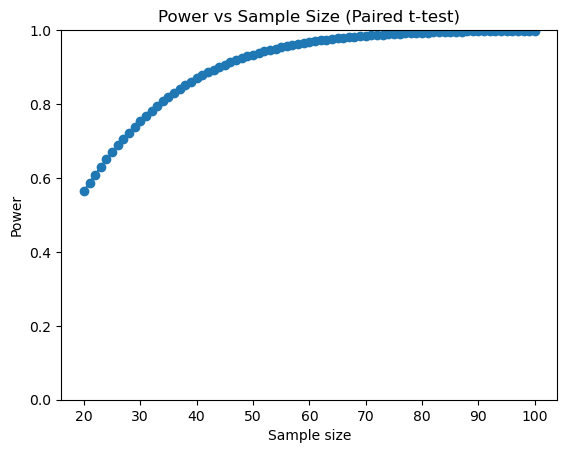

In [6]:
# Power vs sample size (paired t-test)

sample_sizes = np.arange(20, 101)

powers = power_analysis.power(
    effect_size=effect_size,
    nobs=sample_sizes,
    alpha=alpha,
    alternative='two-sided'
)

plt.figure()
plt.plot(sample_sizes, powers, marker='o')
plt.xlabel("Sample size")
plt.ylabel("Power")
plt.title("Power vs Sample Size (Paired t-test)")
plt.ylim(0, 1)
plt.show()


# What question is being asked?
# How does statistical power change as sample size increases, holding everything else fixed?

## Interpretation ##
# For each  n, compute: Power(𝑛)=𝑃(reject 𝐻0 ∣ 𝑑 =0.5)

# Power increases monotonically with sample size, 
# but the marginal gain from each additional observation decreases rapidly once moderate power is reached.

# “A sweet spot of approximately 40–60 participants”
# Below this range, the study is likely underpowered
# Above this range, power gains are increasingly expensive



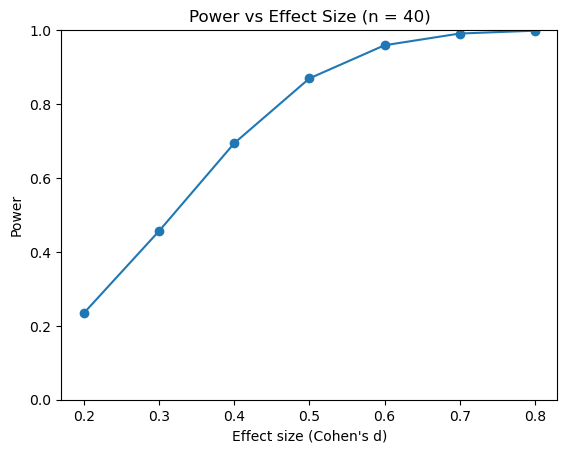

In [7]:
# Power vs effect size (fixed n = 40)
effect_sizes = np.arange(0.2, 0.9, 0.1)

powers_effect = power_analysis.power(
    effect_size=effect_sizes,
    nobs=40,
    alpha=alpha,
    alternative='two-sided'
)

plt.figure()
plt.plot(effect_sizes, powers_effect, marker='o')
plt.xlabel("Effect size (Cohen's d)")
plt.ylabel("Power")
plt.title("Power vs Effect Size (n = 40)")
plt.ylim(0, 1)
plt.show()


# What question is being asked?
# The question is no longer about data quantity, but about signal strength.
# Given a fixed sample size (n = 40), how sensitive is the study to effects of different magnitudes?


## Interpretation ##
# For each assumed d: Power(d)=P(reject H0 ∣ d)
# At a fixed sample size, power is extremely sensitive to the assumed effect size,
# and small overestimates of effect magnitude can dramatically inflate expected power.

# With sample size fixed, power is driven almost entirely by assumed effect size, making power analysis highly sensitive to optimistic assumptions.


## Concrete implications ##
# This plot exposes the fragility of power analysis.

# ** Power does not degrade gently with smaller effects
# It collapses quickly
# Which means optimistic effect-size assumptions are catastrophic

# This is why:
# Published studies are often underpowered
# Replication fails
# Pre-study power calculations look “reasonable” but are wrong

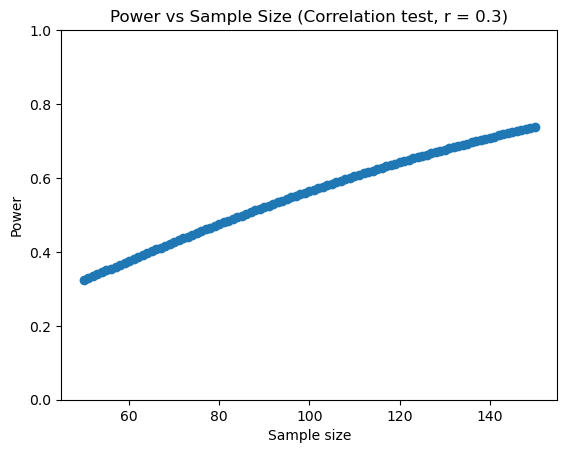

In [10]:
# Correlation test: power vs sample size

correlation_power = NormalIndPower()

r = 0.3
sample_sizes_corr = np.arange(50, 151)

powers_corr = correlation_power.power(
    effect_size=r,
    nobs1=sample_sizes_corr,
    alpha=alpha,
    alternative='two-sided'
)

plt.figure()
plt.plot(sample_sizes_corr, powers_corr, marker='o')
plt.xlabel("Sample size")
plt.ylabel("Power")
plt.title("Power vs Sample Size (Correlation test, r = 0.3)")
plt.ylim(0, 1)
plt.show()



# What question is being asked?
# How much data is required to reliably detect a moderate correlation (r = 0.3)?

## Interpretation ##
# For each n: Power(n)=P(reject H0 ∣ r=0.3)
# signal < noise
# Detecting even a moderate correlation requires substantially larger samples than detecting a moderate mean difference.
# Statistically, r=0.3 is hard to detect.


# Correlation tests require much larger samples than mean-difference tests because 
# correlations are statistically noisy, even when substantively meaningful.